Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import DataLoader

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from utils import extract_time
from utils import random_generator
from utils import MinMaxScaler
from utils import sine_data_generation
from utils import visualization

from modules_and_training import TimeGAN
from modules_and_training import Time_GAN_module


Parameters

In [2]:
#output_size = 20
gamma = 1
no, seq_len, dim = 12800, 24, 1

parameters = dict()
parameters['module'] = 'gru' 
parameters['hidden_dim'] = 40
parameters['num_layers'] = 1
parameters['iterations'] = 100
parameters['batch_size'] = 128
parameters['epoch'] = 2

Data Generation:
12800 synthetic time univariate timeseries are created, with 24 timesteps each 

In [3]:
data = sine_data_generation(no, seq_len, dim)
data = MinMaxScaler(data)
data = torch.Tensor(data)
data.shape

torch.Size([12800, 24, 1])

Training and Examination of generating process: for each epoch a single sample is generated from the current state of the generator and visualized alongside with the coressponding loss values

Start Embedding Network Training
step: 1/2, e_loss: 0.51100284
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 1/2, s_loss: 0.090296715
Finish Training with Supervised Loss Only
Start Joint Training
step: 0/2, D_loss: 4.27421, G_loss_U: 0.20043802, G_loss_S: 0.0058137397, E_loss_t0: 2.58683


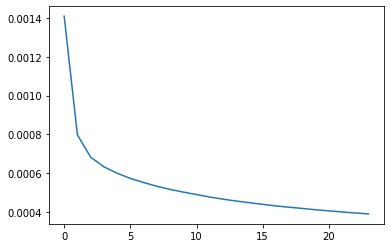

step: 0/2, D_loss: 3.5568297, G_loss_U: 0.31894007, G_loss_S: 0.0055213287, E_loss_t0: 2.485233


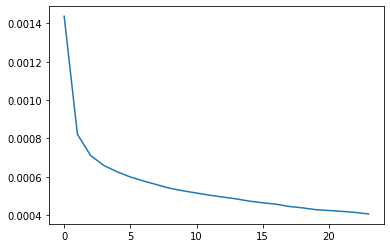

step: 0/2, D_loss: 2.8025389, G_loss_U: 0.47640505, G_loss_S: 0.005805382, E_loss_t0: 2.5163925


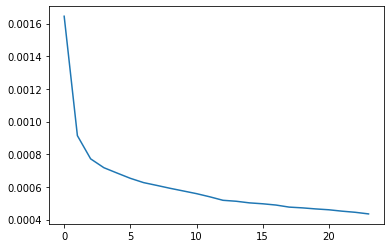

step: 0/2, D_loss: 2.299723, G_loss_U: 0.6453089, G_loss_S: 0.0062313033, E_loss_t0: 2.6431184


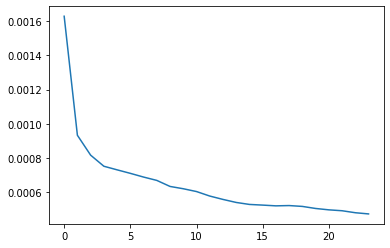

step: 0/2, D_loss: 2.0359397, G_loss_U: 0.80377275, G_loss_S: 0.005690387, E_loss_t0: 2.5946443


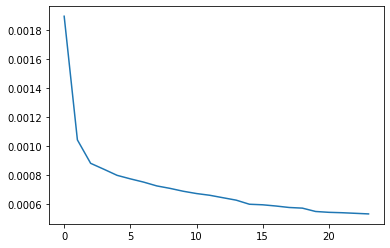

step: 0/2, D_loss: 1.9186175, G_loss_U: 0.940425, G_loss_S: 0.005438288, E_loss_t0: 2.5480876


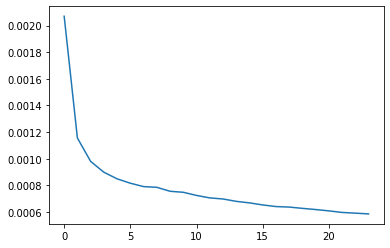

step: 0/2, D_loss: 1.8741313, G_loss_U: 1.0505104, G_loss_S: 0.0054465057, E_loss_t0: 2.5969787


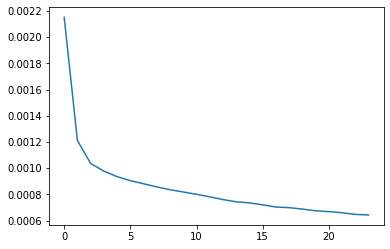

step: 0/2, D_loss: 1.8603354, G_loss_U: 1.1315211, G_loss_S: 0.0058732885, E_loss_t0: 2.586709


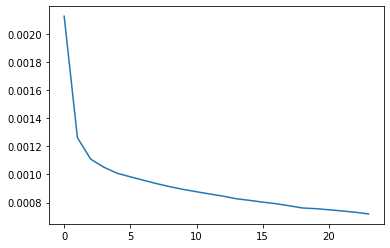

step: 0/2, D_loss: 1.8568461, G_loss_U: 1.1816391, G_loss_S: 0.0057479553, E_loss_t0: 2.5471284


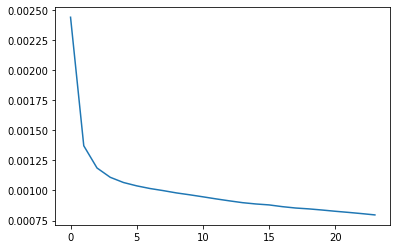

step: 0/2, D_loss: 1.8528645, G_loss_U: 1.1999723, G_loss_S: 0.0054983855, E_loss_t0: 2.614502


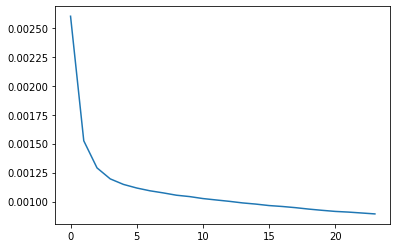

step: 0/2, D_loss: 1.8426559, G_loss_U: 1.186804, G_loss_S: 0.0057162615, E_loss_t0: 2.5860217


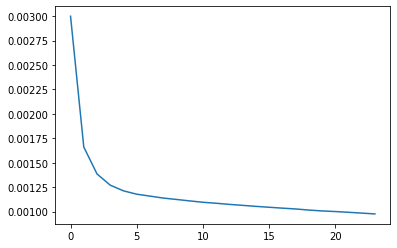

step: 0/2, D_loss: 1.8237914, G_loss_U: 1.1440161, G_loss_S: 0.0056373808, E_loss_t0: 2.5547552


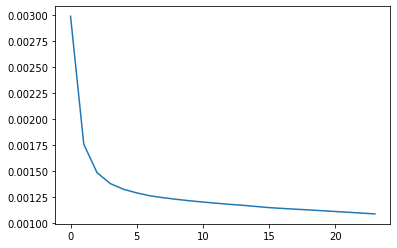

step: 0/2, D_loss: 1.7960297, G_loss_U: 1.0757653, G_loss_S: 0.005795383, E_loss_t0: 2.6074188


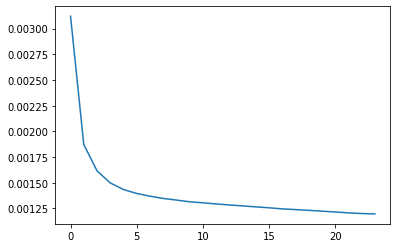

step: 0/2, D_loss: 1.7629315, G_loss_U: 0.9891717, G_loss_S: 0.005805078, E_loss_t0: 2.5708814


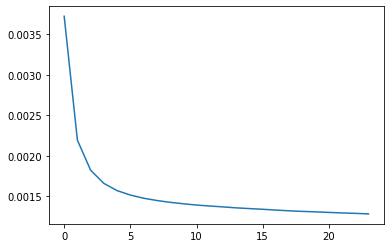

step: 0/2, D_loss: 1.7283846, G_loss_U: 0.8956945, G_loss_S: 0.0055043027, E_loss_t0: 2.6077447


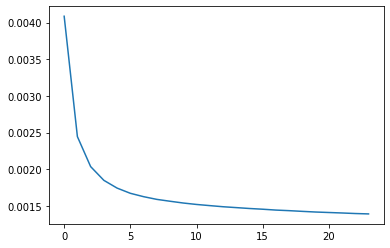

step: 0/2, D_loss: 1.6976806, G_loss_U: 0.811735, G_loss_S: 0.005619501, E_loss_t0: 2.6018298


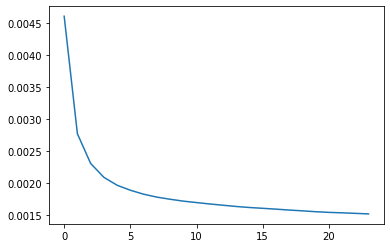

step: 0/2, D_loss: 1.6697565, G_loss_U: 0.7504344, G_loss_S: 0.0054773693, E_loss_t0: 2.5798123


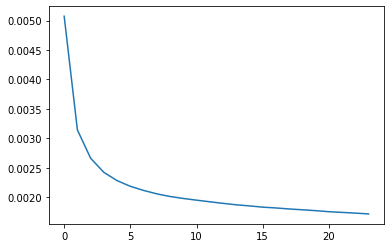

step: 0/2, D_loss: 1.6367006, G_loss_U: 0.71222854, G_loss_S: 0.005799136, E_loss_t0: 2.5939841


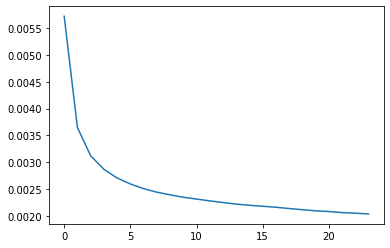

step: 0/2, D_loss: 1.5978808, G_loss_U: 0.69329077, G_loss_S: 0.0057256874, E_loss_t0: 2.5706327


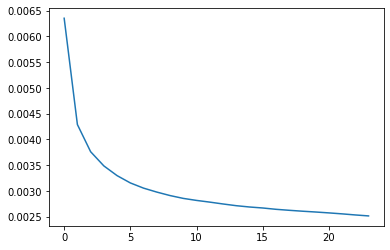

step: 0/2, D_loss: 1.5610427, G_loss_U: 0.69283295, G_loss_S: 0.005567754, E_loss_t0: 2.612119


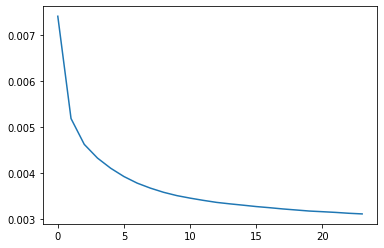

step: 0/2, D_loss: 1.5297544, G_loss_U: 0.7150119, G_loss_S: 0.005841544, E_loss_t0: 2.5998065


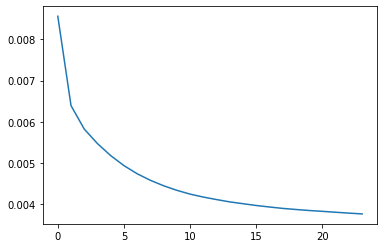

step: 0/2, D_loss: 1.5006723, G_loss_U: 0.77430457, G_loss_S: 0.005548851, E_loss_t0: 2.5954955


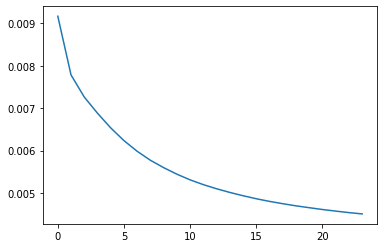

step: 0/2, D_loss: 1.4716725, G_loss_U: 0.92019147, G_loss_S: 0.0055111214, E_loss_t0: 2.5896385


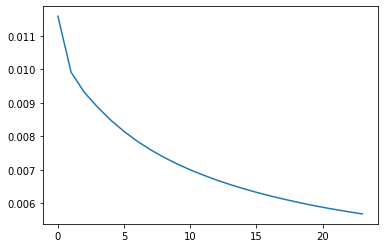

step: 0/2, D_loss: 1.4404112, G_loss_U: 1.122784, G_loss_S: 0.005705165, E_loss_t0: 2.591358


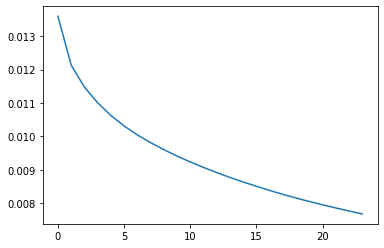

step: 0/2, D_loss: 1.3855709, G_loss_U: 0.64947146, G_loss_S: 0.0054272506, E_loss_t0: 2.500229


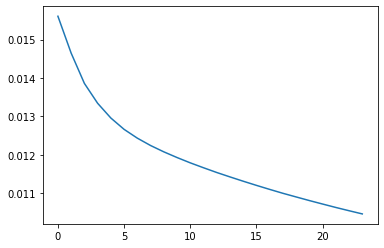

step: 0/2, D_loss: 1.4091613, G_loss_U: 0.57603884, G_loss_S: 0.006291097, E_loss_t0: 2.5866654


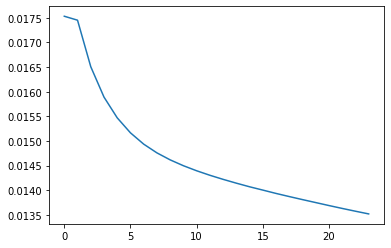

step: 0/2, D_loss: 1.4243692, G_loss_U: 0.6091935, G_loss_S: 0.005901423, E_loss_t0: 2.5489476


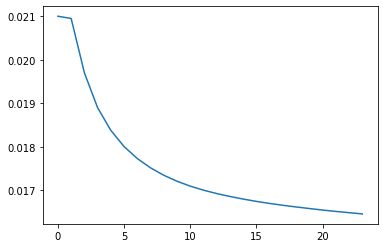

step: 0/2, D_loss: 1.3772458, G_loss_U: 1.8410033, G_loss_S: 0.006217146, E_loss_t0: 2.561394


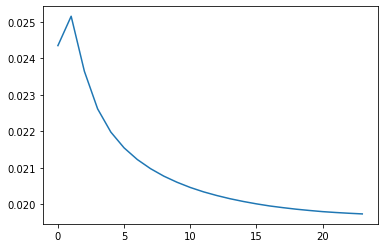

step: 0/2, D_loss: 0.94555044, G_loss_U: 2.036805, G_loss_S: 0.0060701245, E_loss_t0: 2.5404031


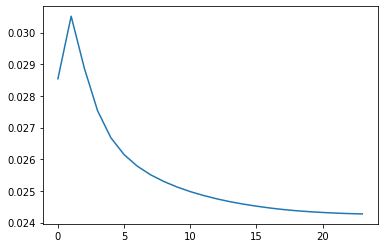

step: 0/2, D_loss: 0.83350664, G_loss_U: 0.6804541, G_loss_S: 0.0061445185, E_loss_t0: 2.507545


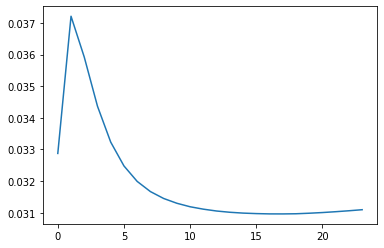

step: 0/2, D_loss: 1.2250936, G_loss_U: 2.6479042, G_loss_S: 0.0064855064, E_loss_t0: 2.4981377


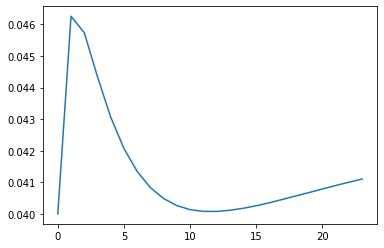

step: 0/2, D_loss: 2.4024477, G_loss_U: 2.6289093, G_loss_S: 0.006724953, E_loss_t0: 2.4858174


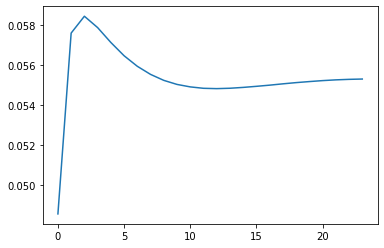

step: 0/2, D_loss: 2.2500973, G_loss_U: 1.6335484, G_loss_S: 0.007081107, E_loss_t0: 2.508361


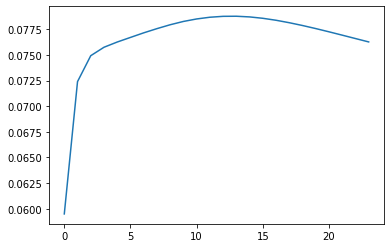

step: 0/2, D_loss: 0.68588674, G_loss_U: 2.169175, G_loss_S: 0.007410212, E_loss_t0: 2.443856


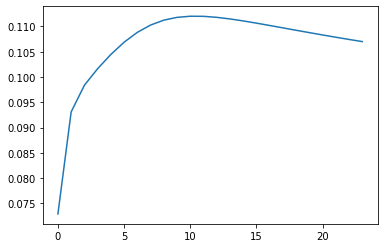

step: 0/2, D_loss: 0.55816156, G_loss_U: 2.2772663, G_loss_S: 0.008446756, E_loss_t0: 2.4078188


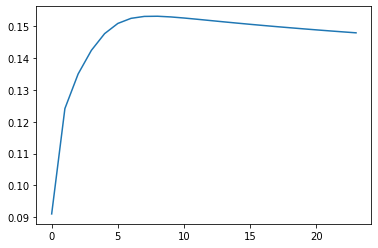

step: 0/2, D_loss: 0.5414834, G_loss_U: 2.3259604, G_loss_S: 0.008769291, E_loss_t0: 2.382934


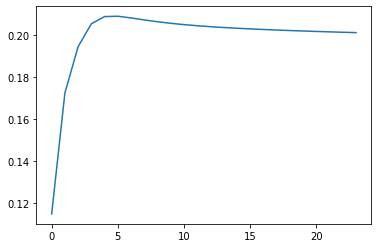

step: 0/2, D_loss: 0.5286523, G_loss_U: 2.342592, G_loss_S: 0.009326283, E_loss_t0: 2.201382


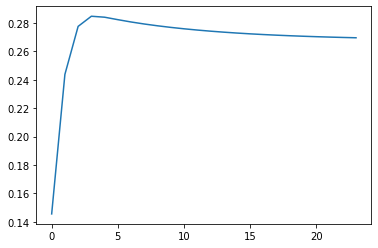

step: 0/2, D_loss: 0.48161417, G_loss_U: 2.3439698, G_loss_S: 0.009852805, E_loss_t0: 2.0990605


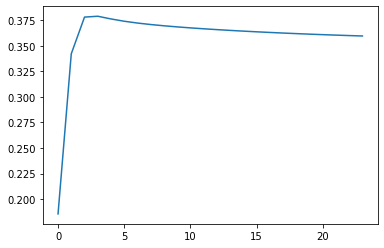

step: 0/2, D_loss: 0.42530316, G_loss_U: 2.3429885, G_loss_S: 0.010366734, E_loss_t0: 1.9000717


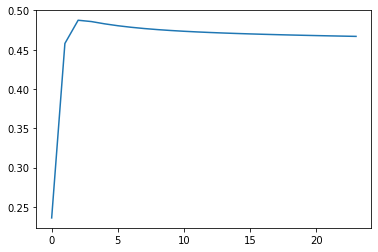

step: 0/2, D_loss: 0.37090182, G_loss_U: 2.3495498, G_loss_S: 0.010866348, E_loss_t0: 1.7383605


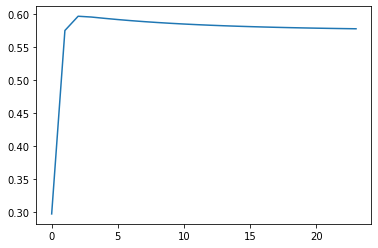

step: 0/2, D_loss: 0.32960263, G_loss_U: 2.3698866, G_loss_S: 0.012249475, E_loss_t0: 1.6789925


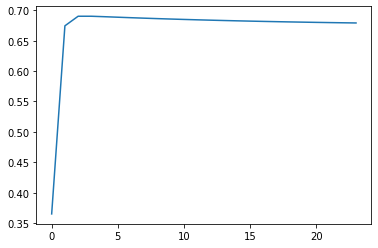

step: 0/2, D_loss: 0.29816788, G_loss_U: 2.4085207, G_loss_S: 0.012785349, E_loss_t0: 1.6283737


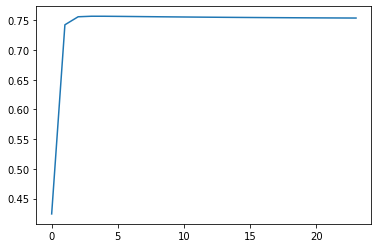

step: 0/2, D_loss: 0.27339786, G_loss_U: 2.4682949, G_loss_S: 0.012944137, E_loss_t0: 1.8362736


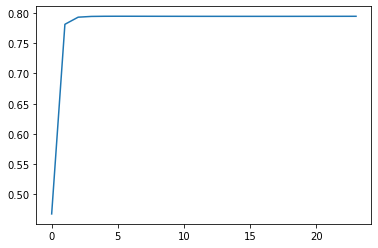

step: 0/2, D_loss: 0.2514322, G_loss_U: 2.5499096, G_loss_S: 0.013849261, E_loss_t0: 1.8530113


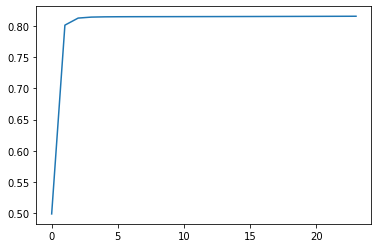

step: 0/2, D_loss: 0.23103268, G_loss_U: 2.651344, G_loss_S: 0.01490372, E_loss_t0: 1.9014684


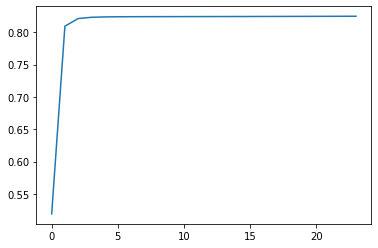

step: 0/2, D_loss: 0.21184167, G_loss_U: 2.7681768, G_loss_S: 0.015408531, E_loss_t0: 1.8854468


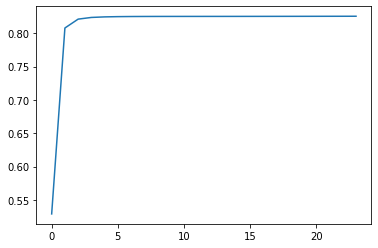

step: 0/2, D_loss: 0.19342571, G_loss_U: 2.8950627, G_loss_S: 0.015222762, E_loss_t0: 1.9696399


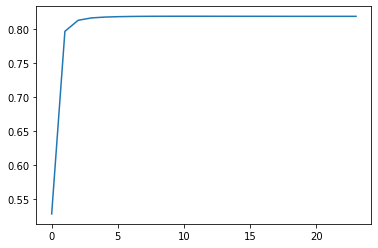

step: 0/2, D_loss: 0.17687076, G_loss_U: 3.0268784, G_loss_S: 0.016597474, E_loss_t0: 1.9487191


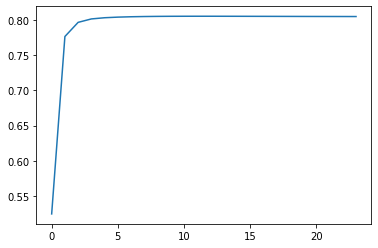

step: 0/2, D_loss: 0.16188468, G_loss_U: 3.1595793, G_loss_S: 0.017584208, E_loss_t0: 1.8500775


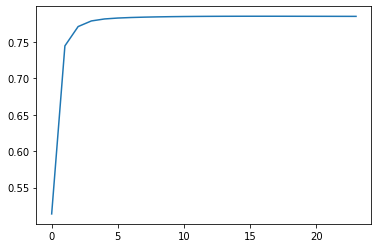

step: 0/2, D_loss: 0.14916655, G_loss_U: 3.1561334, G_loss_S: 0.017234925, E_loss_t0: 1.8632694


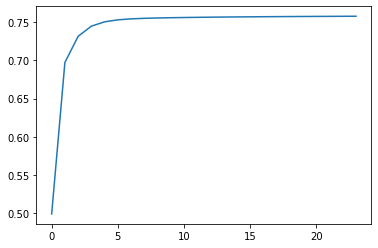

step: 0/2, D_loss: 0.14820069, G_loss_U: 3.1527555, G_loss_S: 0.018494409, E_loss_t0: 1.7752906


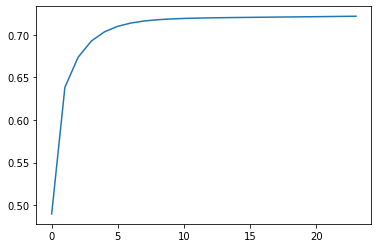

step: 0/2, D_loss: 0.14806074, G_loss_U: 3.1496258, G_loss_S: 0.018859753, E_loss_t0: 1.6320164


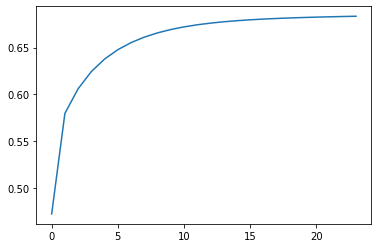

step: 0/2, D_loss: 0.148191, G_loss_U: 3.1468937, G_loss_S: 0.018236943, E_loss_t0: 1.6873822


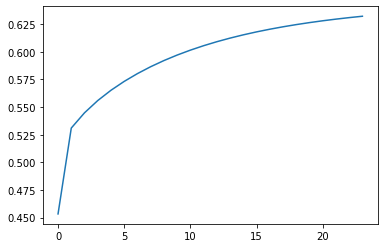

step: 0/2, D_loss: 0.14798318, G_loss_U: 3.144637, G_loss_S: 0.019126097, E_loss_t0: 1.6459291


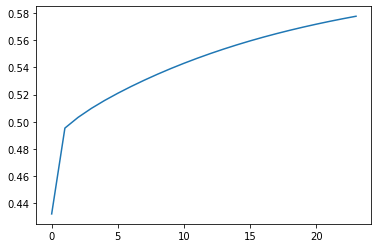

step: 0/2, D_loss: 0.14727135, G_loss_U: 3.1428478, G_loss_S: 0.0191715, E_loss_t0: 1.6693239


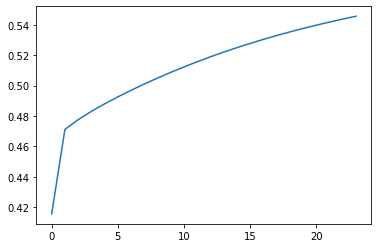

step: 0/2, D_loss: 0.14747566, G_loss_U: 3.1414614, G_loss_S: 0.019130688, E_loss_t0: 1.6889613


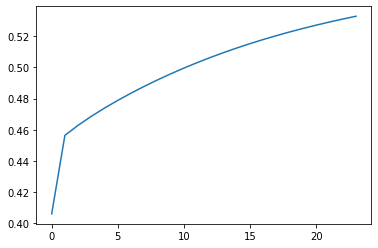

step: 0/2, D_loss: 0.14723054, G_loss_U: 3.1403933, G_loss_S: 0.019507574, E_loss_t0: 1.6932577


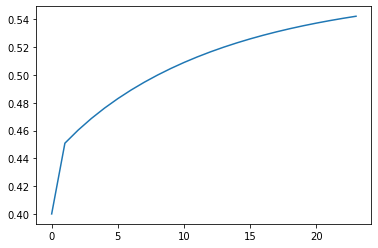

step: 0/2, D_loss: 0.14714774, G_loss_U: 3.1395638, G_loss_S: 0.020079015, E_loss_t0: 1.7277949


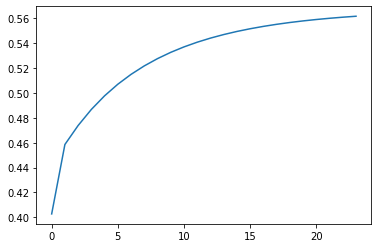

step: 0/2, D_loss: 0.14707829, G_loss_U: 3.1389081, G_loss_S: 0.020114725, E_loss_t0: 1.7124304


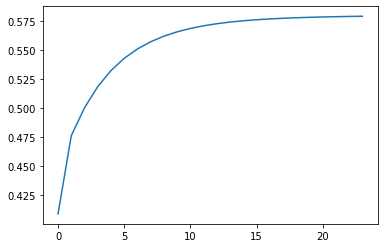

step: 0/2, D_loss: 0.14695783, G_loss_U: 3.1383774, G_loss_S: 0.020061675, E_loss_t0: 1.6790762


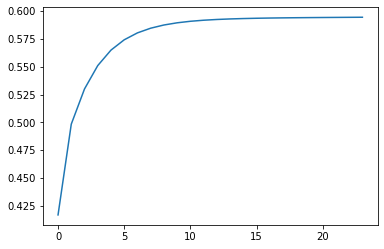

step: 0/2, D_loss: 0.14677061, G_loss_U: 3.1379385, G_loss_S: 0.02049234, E_loss_t0: 1.6383682


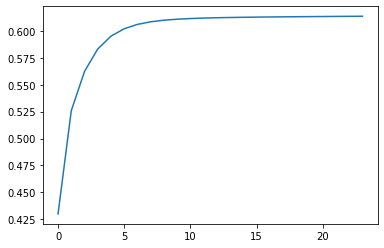

step: 0/2, D_loss: 0.14693952, G_loss_U: 3.1375647, G_loss_S: 0.020094782, E_loss_t0: 1.6780725


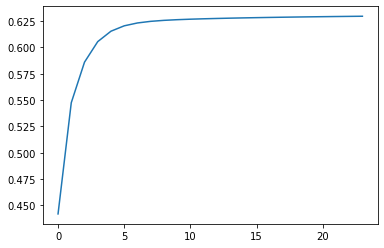

step: 0/2, D_loss: 0.14637007, G_loss_U: 3.1372378, G_loss_S: 0.02083553, E_loss_t0: 1.7434103


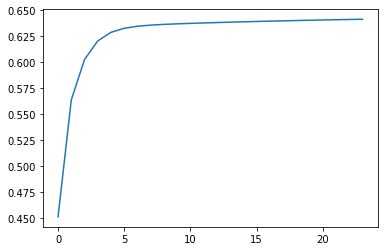

step: 0/2, D_loss: 0.14664261, G_loss_U: 3.136944, G_loss_S: 0.02060225, E_loss_t0: 1.6560857


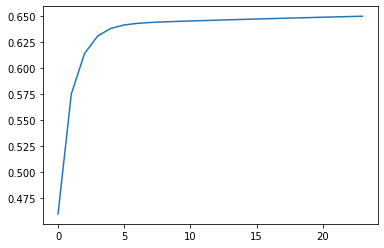

step: 0/2, D_loss: 0.1467395, G_loss_U: 3.1366718, G_loss_S: 0.020665297, E_loss_t0: 1.6927838


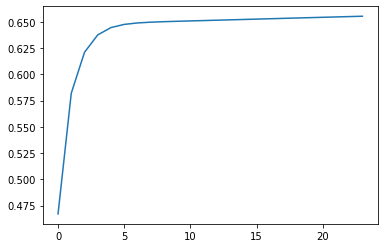

step: 0/2, D_loss: 0.14639588, G_loss_U: 3.136411, G_loss_S: 0.020677125, E_loss_t0: 1.6426079


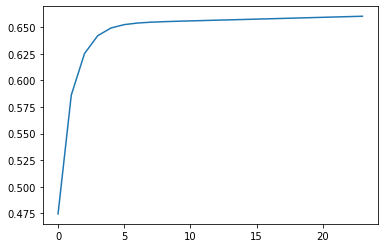

step: 0/2, D_loss: 0.14690156, G_loss_U: 3.1361535, G_loss_S: 0.020805817, E_loss_t0: 1.6581928


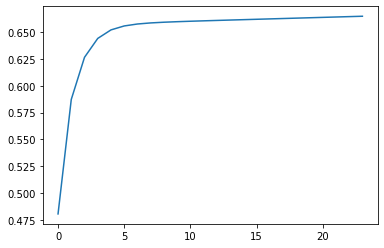

step: 0/2, D_loss: 0.14694117, G_loss_U: 3.13589, G_loss_S: 0.019894088, E_loss_t0: 1.6893367


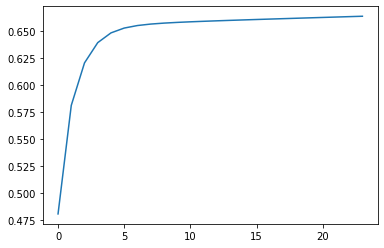

step: 0/2, D_loss: 0.14688066, G_loss_U: 3.1356094, G_loss_S: 0.020436661, E_loss_t0: 1.6682643


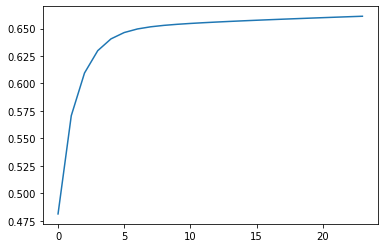

step: 0/2, D_loss: 0.1467356, G_loss_U: 3.135297, G_loss_S: 0.019762438, E_loss_t0: 1.671119


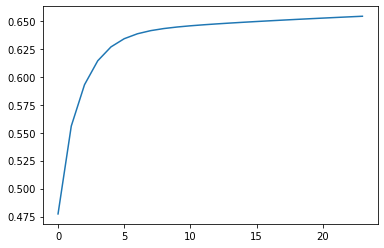

step: 0/2, D_loss: 0.14710818, G_loss_U: 3.1349354, G_loss_S: 0.020047741, E_loss_t0: 1.7331744


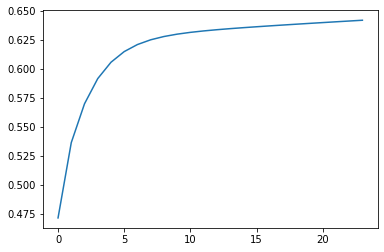

step: 0/2, D_loss: 0.14734182, G_loss_U: 3.134497, G_loss_S: 0.020068258, E_loss_t0: 1.6443195


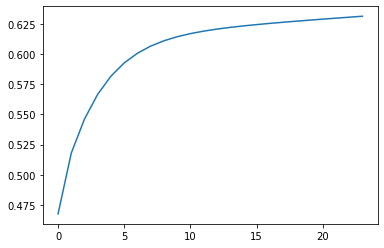

step: 0/2, D_loss: 0.14723001, G_loss_U: 3.1339395, G_loss_S: 0.02038211, E_loss_t0: 1.6503694


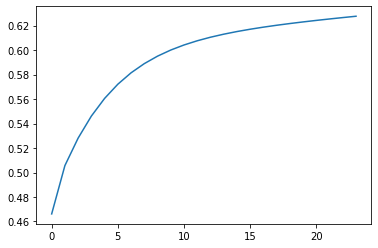

step: 0/2, D_loss: 0.14744838, G_loss_U: 3.1332006, G_loss_S: 0.01929645, E_loss_t0: 1.607703


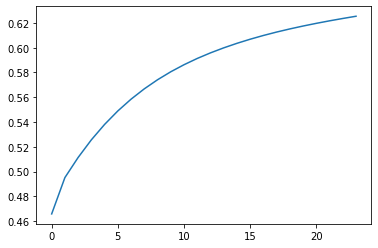

step: 0/2, D_loss: 0.14794034, G_loss_U: 3.132189, G_loss_S: 0.019247519, E_loss_t0: 1.6315193


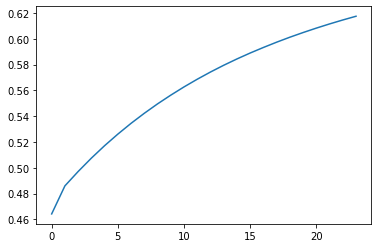

step: 0/2, D_loss: 0.14804757, G_loss_U: 3.1307907, G_loss_S: 0.019748779, E_loss_t0: 1.5916398


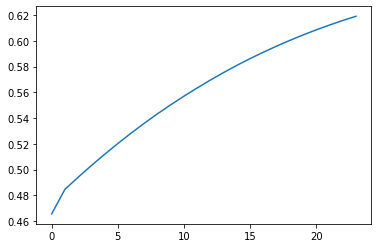

step: 0/2, D_loss: 0.14850824, G_loss_U: 3.1289065, G_loss_S: 0.019489076, E_loss_t0: 1.6064291


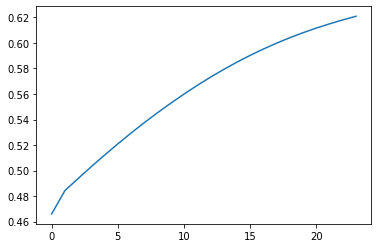

step: 0/2, D_loss: 0.14882246, G_loss_U: 3.1265554, G_loss_S: 0.019691456, E_loss_t0: 1.5834227


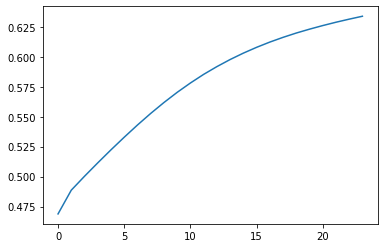

step: 0/2, D_loss: 0.14924942, G_loss_U: 3.123964, G_loss_S: 0.019509433, E_loss_t0: 1.5637771


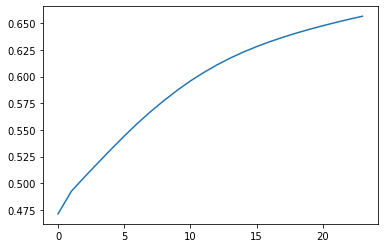

step: 0/2, D_loss: 0.1498555, G_loss_U: 3.1215067, G_loss_S: 0.019526627, E_loss_t0: 1.5374466


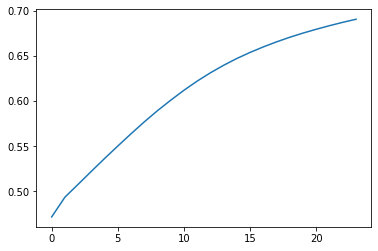

step: 0/2, D_loss: 0.15007, G_loss_U: 3.257822, G_loss_S: 0.019778952, E_loss_t0: 1.5853138


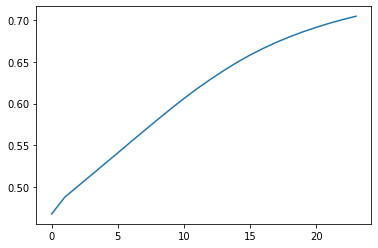

step: 0/2, D_loss: 0.13909768, G_loss_U: 3.2564056, G_loss_S: 0.019388609, E_loss_t0: 1.5039135


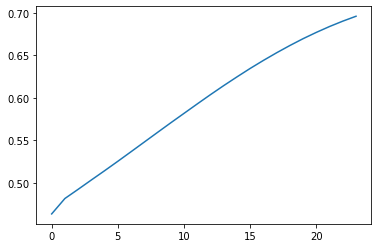

step: 0/2, D_loss: 0.13957898, G_loss_U: 3.2553349, G_loss_S: 0.019756155, E_loss_t0: 1.5234184


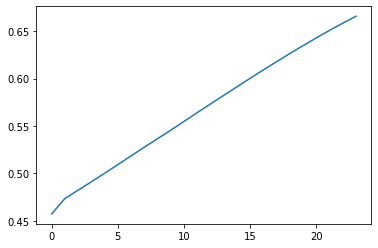

step: 0/2, D_loss: 0.1399785, G_loss_U: 3.2544868, G_loss_S: 0.020205949, E_loss_t0: 1.5137792


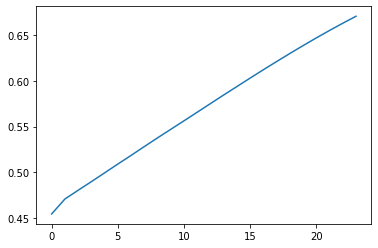

step: 0/2, D_loss: 0.14019391, G_loss_U: 3.2537668, G_loss_S: 0.019638527, E_loss_t0: 1.4725776


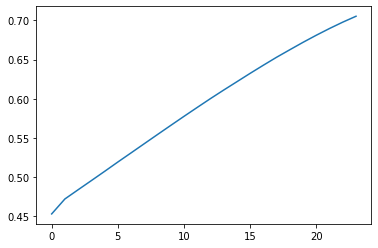

step: 0/2, D_loss: 0.1402394, G_loss_U: 3.2531388, G_loss_S: 0.019779207, E_loss_t0: 1.4712042


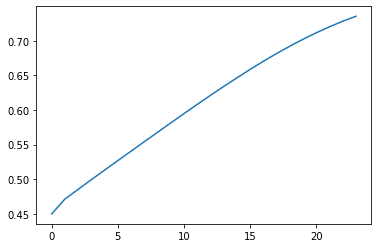

step: 0/2, D_loss: 0.14045264, G_loss_U: 3.2525895, G_loss_S: 0.020085031, E_loss_t0: 1.4323609


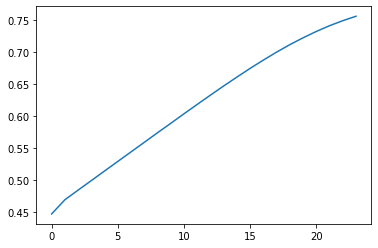

step: 0/2, D_loss: 0.14100255, G_loss_U: 3.2520983, G_loss_S: 0.020170696, E_loss_t0: 1.4224328


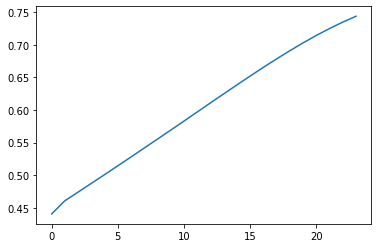

step: 0/2, D_loss: 0.14098072, G_loss_U: 3.2516556, G_loss_S: 0.020790124, E_loss_t0: 1.4016433


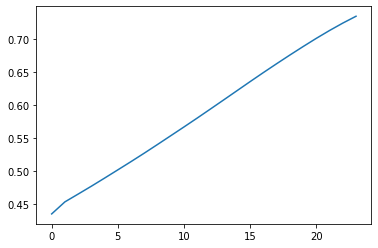

step: 0/2, D_loss: 0.14136553, G_loss_U: 3.251216, G_loss_S: 0.021266079, E_loss_t0: 1.3994042


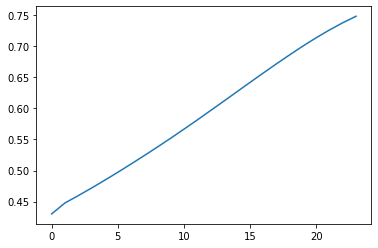

step: 0/2, D_loss: 0.14173412, G_loss_U: 3.250744, G_loss_S: 0.021706974, E_loss_t0: 1.3507777


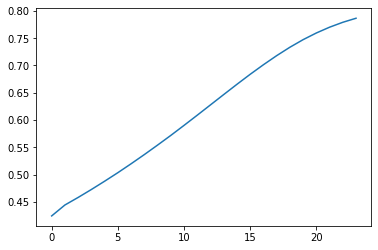

step: 0/2, D_loss: 0.14179617, G_loss_U: 3.2501926, G_loss_S: 0.022025174, E_loss_t0: 1.2884722


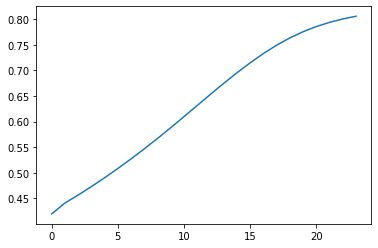

step: 0/2, D_loss: 0.14248063, G_loss_U: 3.2495222, G_loss_S: 0.023818905, E_loss_t0: 1.3489045


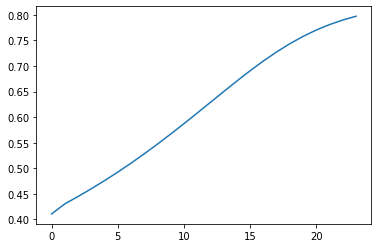

step: 0/2, D_loss: 0.14294969, G_loss_U: 3.2487128, G_loss_S: 0.022715613, E_loss_t0: 1.246362


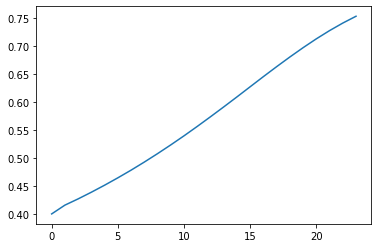

step: 0/2, D_loss: 0.14293315, G_loss_U: 3.2477043, G_loss_S: 0.024657711, E_loss_t0: 1.2222124


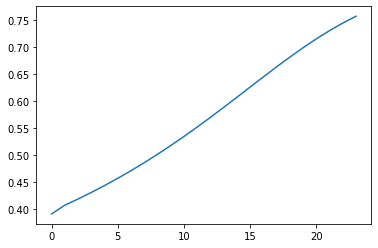

step: 0/2, D_loss: 0.14291503, G_loss_U: 3.2462122, G_loss_S: 0.026163355, E_loss_t0: 1.2324659


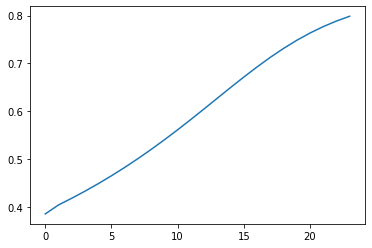

step: 0/2, D_loss: 0.14388478, G_loss_U: 3.2439973, G_loss_S: 0.026036706, E_loss_t0: 1.1319805


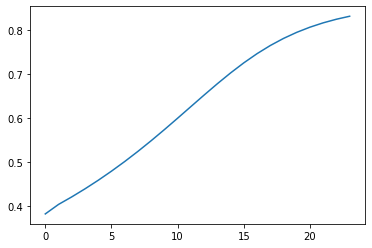

step: 0/2, D_loss: 0.14434023, G_loss_U: 3.2408562, G_loss_S: 0.029395958, E_loss_t0: 1.2155782


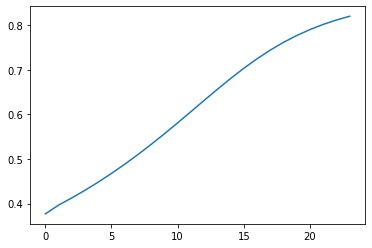

step: 0/2, D_loss: 0.14519463, G_loss_U: 3.2370389, G_loss_S: 0.03016918, E_loss_t0: 1.22303


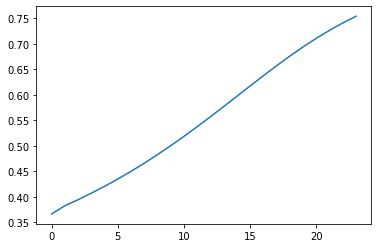

step: 0/2, D_loss: 0.14535837, G_loss_U: 3.232867, G_loss_S: 0.030890645, E_loss_t0: 1.1522125


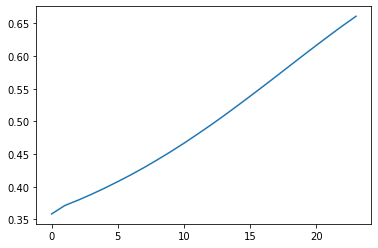

step: 1/2, D_loss: 0.18586288, G_loss_U: 2.261344, G_loss_S: 0.033317868, E_loss_t0: 1.2012022


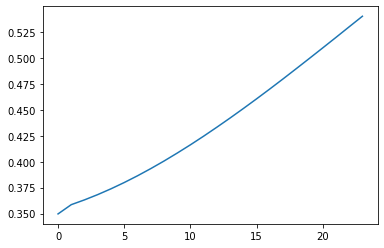

step: 1/2, D_loss: 0.26387054, G_loss_U: 2.2321947, G_loss_S: 0.031958282, E_loss_t0: 1.1440982


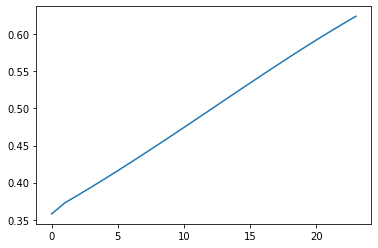

step: 1/2, D_loss: 0.25419876, G_loss_U: 2.3580923, G_loss_S: 0.035543732, E_loss_t0: 1.1404195


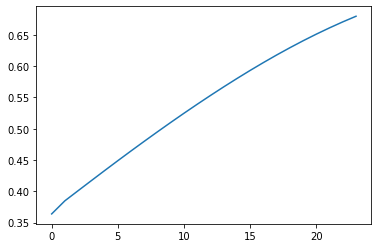

step: 1/2, D_loss: 0.21769111, G_loss_U: 2.4509397, G_loss_S: 0.042991214, E_loss_t0: 1.1406775


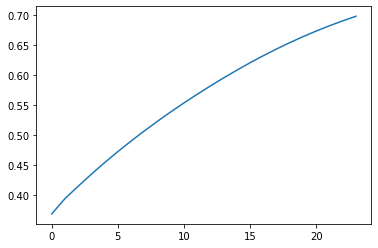

step: 1/2, D_loss: 0.1991813, G_loss_U: 2.5301979, G_loss_S: 0.03980333, E_loss_t0: 1.1324558


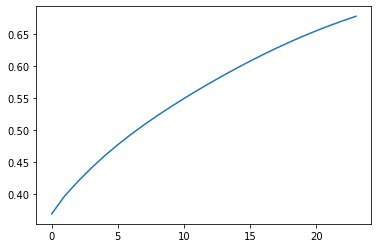

step: 1/2, D_loss: 0.18929644, G_loss_U: 2.6036968, G_loss_S: 0.03682969, E_loss_t0: 1.1313725


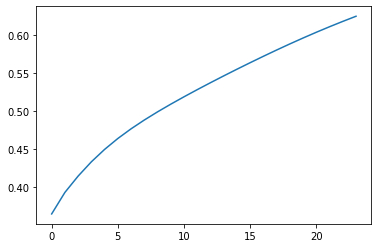

step: 1/2, D_loss: 0.18392588, G_loss_U: 2.6739557, G_loss_S: 0.036935244, E_loss_t0: 1.0758605


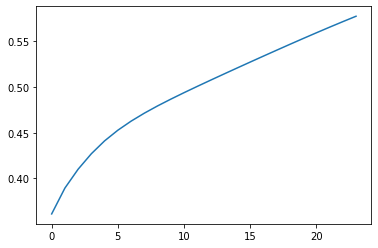

step: 1/2, D_loss: 0.18353714, G_loss_U: 2.7401922, G_loss_S: 0.037620958, E_loss_t0: 1.1007451


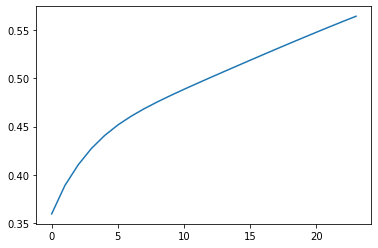

step: 1/2, D_loss: 0.2995187, G_loss_U: 2.5675173, G_loss_S: 0.035571538, E_loss_t0: 1.1313142


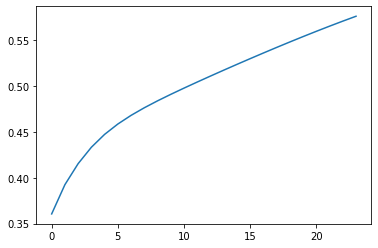

step: 1/2, D_loss: 0.17965275, G_loss_U: 2.354006, G_loss_S: 0.035717953, E_loss_t0: 1.0740354


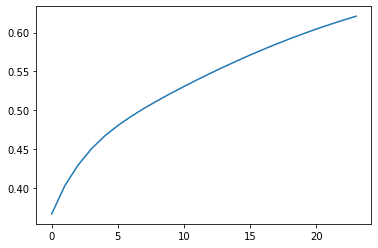

step: 1/2, D_loss: 0.20455411, G_loss_U: 1.8521751, G_loss_S: 0.03724291, E_loss_t0: 1.0460896


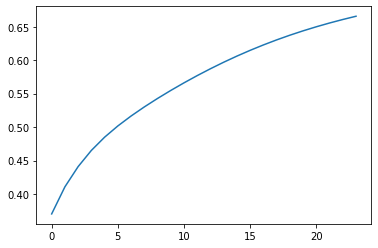

step: 1/2, D_loss: 0.3391491, G_loss_U: 2.3818011, G_loss_S: 0.037377324, E_loss_t0: 1.0751747


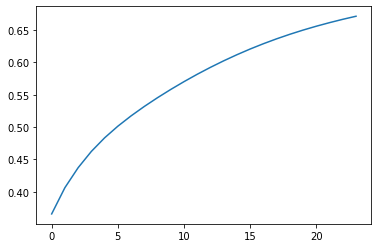

step: 1/2, D_loss: 0.2023938, G_loss_U: 2.6427915, G_loss_S: 0.039812736, E_loss_t0: 1.0439692


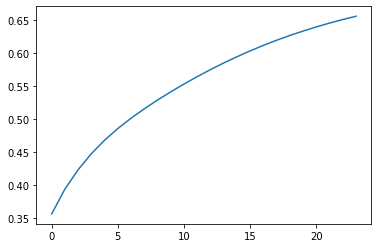

step: 1/2, D_loss: 0.16522846, G_loss_U: 2.8470964, G_loss_S: 0.039117433, E_loss_t0: 1.0157042


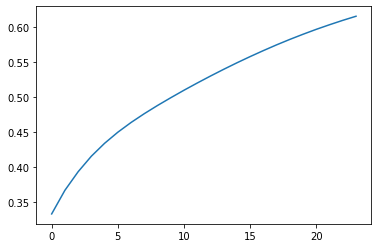

step: 1/2, D_loss: 0.14546642, G_loss_U: 2.8466823, G_loss_S: 0.038207337, E_loss_t0: 1.0383536


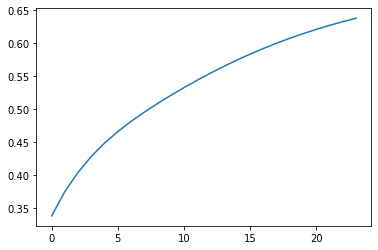

step: 1/2, D_loss: 0.14505038, G_loss_U: 2.8462436, G_loss_S: 0.03898352, E_loss_t0: 0.98875374


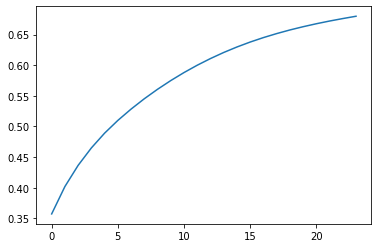

step: 1/2, D_loss: 0.14479527, G_loss_U: 2.845742, G_loss_S: 0.038082585, E_loss_t0: 0.98057353


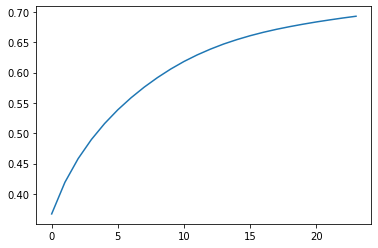

step: 1/2, D_loss: 0.14471565, G_loss_U: 2.8451145, G_loss_S: 0.039257236, E_loss_t0: 1.0150752


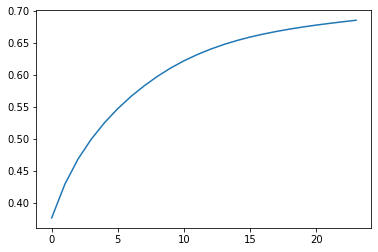

step: 1/2, D_loss: 0.14411701, G_loss_U: 2.844286, G_loss_S: 0.037589163, E_loss_t0: 0.93645906


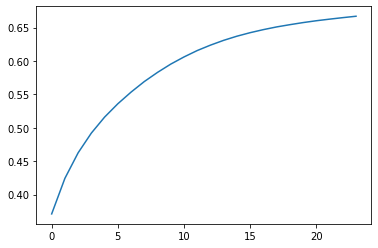

step: 1/2, D_loss: 0.14415185, G_loss_U: 2.8431451, G_loss_S: 0.036295157, E_loss_t0: 0.93526536


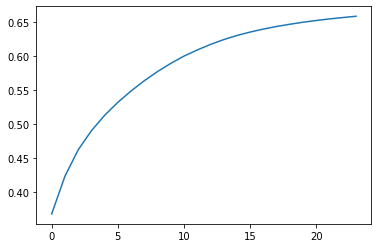

step: 1/2, D_loss: 0.14407969, G_loss_U: 2.8415499, G_loss_S: 0.03677809, E_loss_t0: 0.95528185


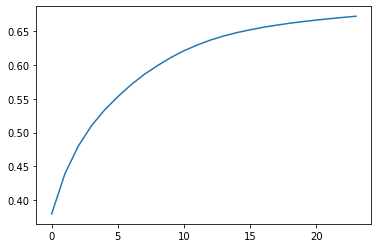

step: 1/2, D_loss: 0.14443919, G_loss_U: 2.8393466, G_loss_S: 0.035516854, E_loss_t0: 0.9218344


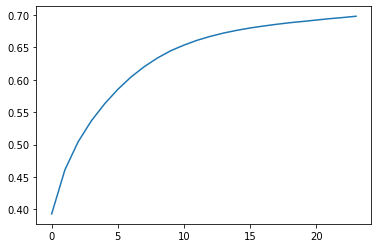

step: 1/2, D_loss: 0.14507833, G_loss_U: 2.836479, G_loss_S: 0.035583887, E_loss_t0: 0.89482003


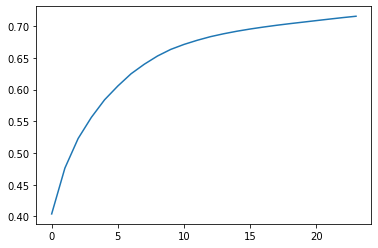

step: 1/2, D_loss: 0.14588423, G_loss_U: 2.833126, G_loss_S: 0.036461655, E_loss_t0: 0.92315763


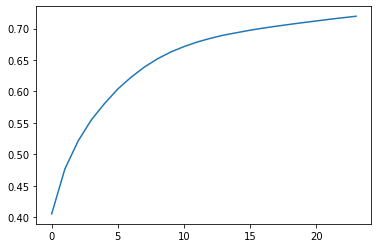

step: 1/2, D_loss: 0.14652899, G_loss_U: 2.8296719, G_loss_S: 0.03461022, E_loss_t0: 0.91393906


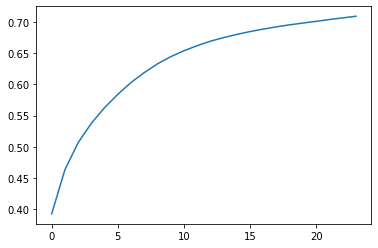

step: 1/2, D_loss: 0.14742193, G_loss_U: 2.826397, G_loss_S: 0.037621375, E_loss_t0: 0.9483499


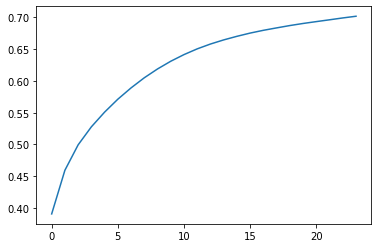

step: 1/2, D_loss: 0.14795572, G_loss_U: 2.8235207, G_loss_S: 0.035388958, E_loss_t0: 0.9270913


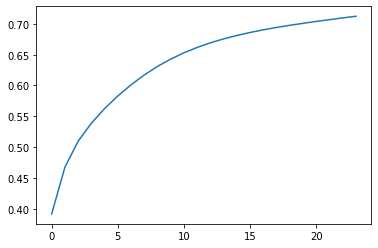

step: 1/2, D_loss: 0.14901075, G_loss_U: 2.821174, G_loss_S: 0.036142923, E_loss_t0: 0.9096653


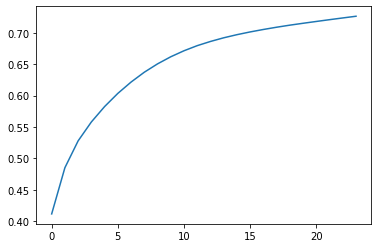

step: 1/2, D_loss: 0.14929248, G_loss_U: 2.8194408, G_loss_S: 0.034832776, E_loss_t0: 0.855997


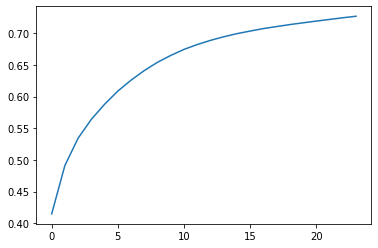

step: 1/2, D_loss: 0.1496542, G_loss_U: 2.818258, G_loss_S: 0.033896994, E_loss_t0: 0.86335486


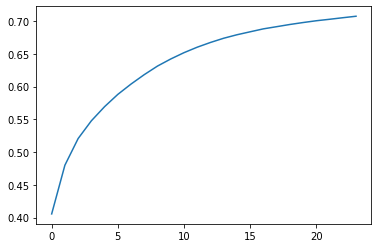

step: 1/2, D_loss: 0.15000091, G_loss_U: 2.997598, G_loss_S: 0.033732463, E_loss_t0: 0.8507544


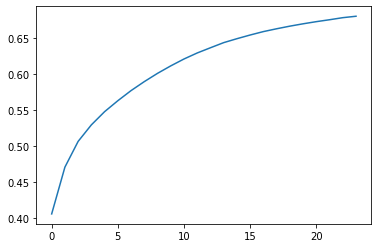

step: 1/2, D_loss: 0.13621649, G_loss_U: 2.9971178, G_loss_S: 0.032965936, E_loss_t0: 0.8636083


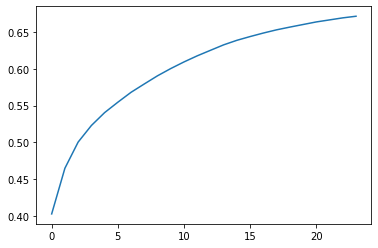

step: 1/2, D_loss: 0.13641264, G_loss_U: 2.9967518, G_loss_S: 0.03247932, E_loss_t0: 0.8602907


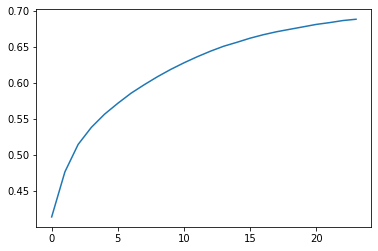

step: 1/2, D_loss: 0.13688442, G_loss_U: 2.9964516, G_loss_S: 0.032035146, E_loss_t0: 0.8493825


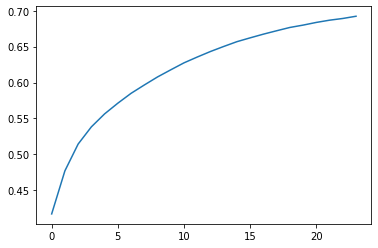

step: 1/2, D_loss: 0.13720246, G_loss_U: 2.9961872, G_loss_S: 0.033665866, E_loss_t0: 0.8735076


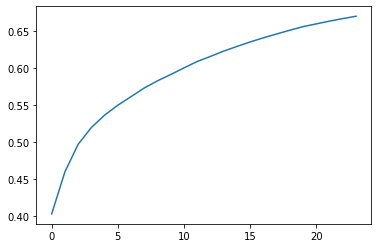

step: 1/2, D_loss: 0.13710408, G_loss_U: 2.995943, G_loss_S: 0.032395635, E_loss_t0: 0.8083152


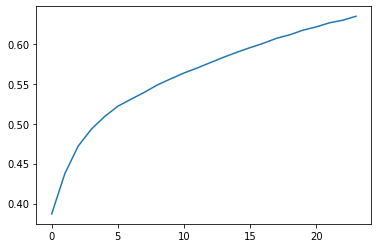

step: 1/2, D_loss: 0.13723035, G_loss_U: 2.9957192, G_loss_S: 0.032065734, E_loss_t0: 0.845748


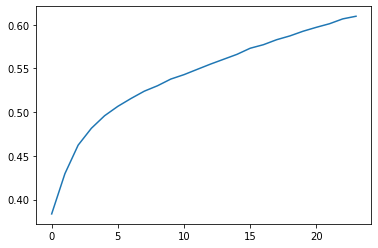

step: 1/2, D_loss: 0.13708086, G_loss_U: 2.9955091, G_loss_S: 0.030856332, E_loss_t0: 0.8070641


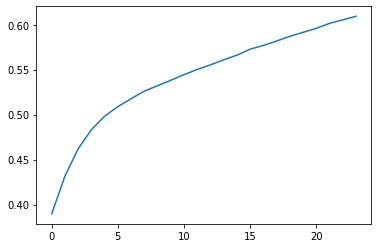

step: 1/2, D_loss: 0.13694698, G_loss_U: 2.9953194, G_loss_S: 0.030395815, E_loss_t0: 0.7791073


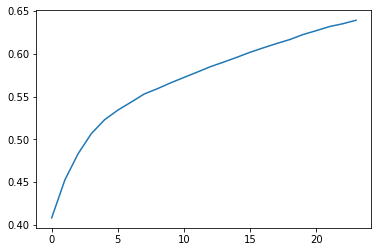

step: 1/2, D_loss: 0.13783579, G_loss_U: 2.995144, G_loss_S: 0.029418966, E_loss_t0: 0.8032101


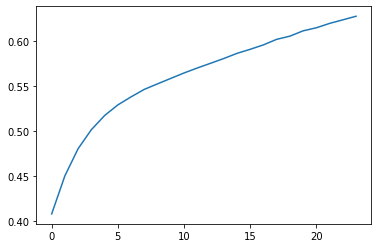

step: 1/2, D_loss: 0.13782452, G_loss_U: 2.994983, G_loss_S: 0.030344713, E_loss_t0: 0.7829788


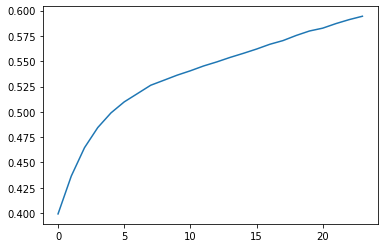

step: 1/2, D_loss: 0.13770516, G_loss_U: 2.99484, G_loss_S: 0.02856367, E_loss_t0: 0.7259393


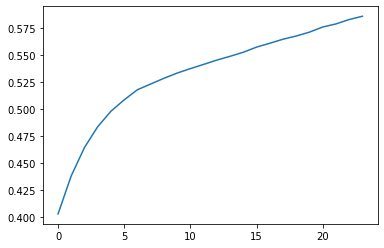

step: 1/2, D_loss: 0.13819836, G_loss_U: 2.994716, G_loss_S: 0.02773669, E_loss_t0: 0.79655457


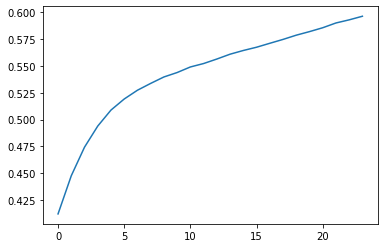

step: 1/2, D_loss: 0.13819554, G_loss_U: 2.9946032, G_loss_S: 0.027574142, E_loss_t0: 0.7703235


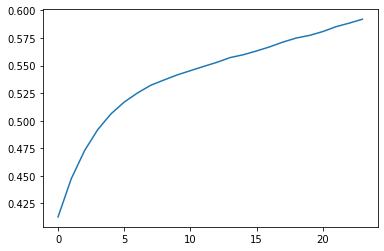

step: 1/2, D_loss: 0.13837716, G_loss_U: 2.9945009, G_loss_S: 0.028113715, E_loss_t0: 0.77664816


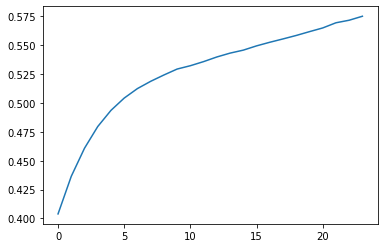

step: 1/2, D_loss: 0.13840678, G_loss_U: 2.9944077, G_loss_S: 0.02726602, E_loss_t0: 0.75815713


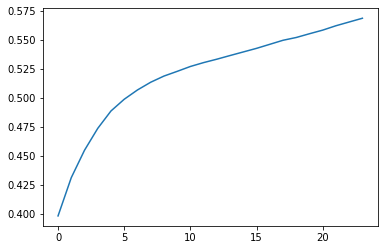

step: 1/2, D_loss: 0.13867502, G_loss_U: 2.9943235, G_loss_S: 0.026115943, E_loss_t0: 0.7515961


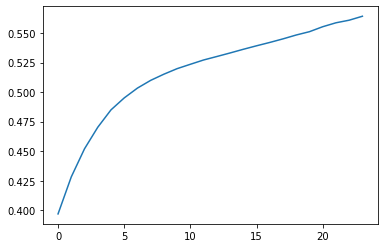

step: 1/2, D_loss: 0.13891222, G_loss_U: 2.994243, G_loss_S: 0.027579531, E_loss_t0: 0.7628224


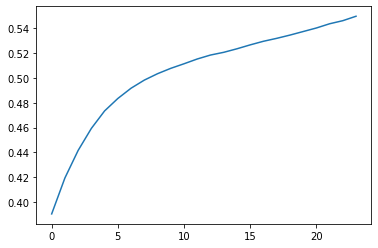

step: 1/2, D_loss: 0.139483, G_loss_U: 2.994167, G_loss_S: 0.027685978, E_loss_t0: 0.7522162


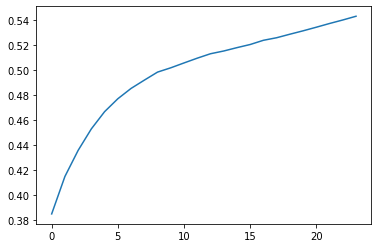

step: 1/2, D_loss: 0.13920641, G_loss_U: 2.9940984, G_loss_S: 0.026116716, E_loss_t0: 0.738879


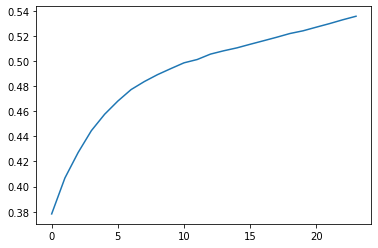

step: 1/2, D_loss: 0.14046033, G_loss_U: 2.994032, G_loss_S: 0.027078962, E_loss_t0: 0.7684785


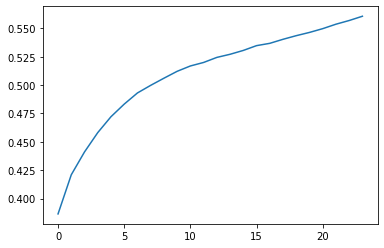

step: 1/2, D_loss: 0.14021151, G_loss_U: 2.993974, G_loss_S: 0.026177738, E_loss_t0: 0.72040266


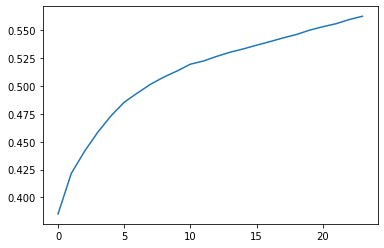

step: 1/2, D_loss: 0.13956858, G_loss_U: 2.9939225, G_loss_S: 0.025022939, E_loss_t0: 0.6975639


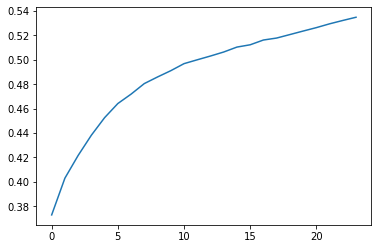

step: 1/2, D_loss: 0.13972835, G_loss_U: 2.9938676, G_loss_S: 0.024766022, E_loss_t0: 0.7421582


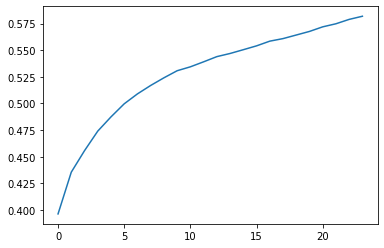

step: 1/2, D_loss: 0.14052857, G_loss_U: 2.9938138, G_loss_S: 0.02465195, E_loss_t0: 0.70082164


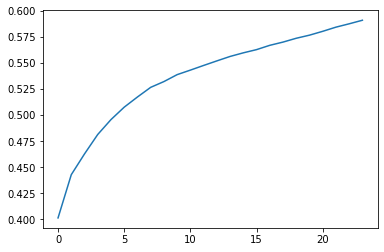

step: 1/2, D_loss: 0.14035428, G_loss_U: 2.993757, G_loss_S: 0.024623299, E_loss_t0: 0.714202


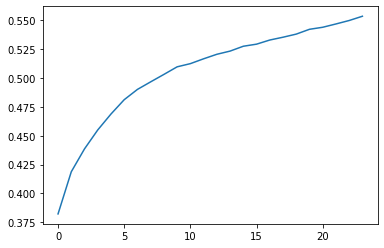

step: 1/2, D_loss: 0.14026085, G_loss_U: 2.9936907, G_loss_S: 0.023608936, E_loss_t0: 0.69855255


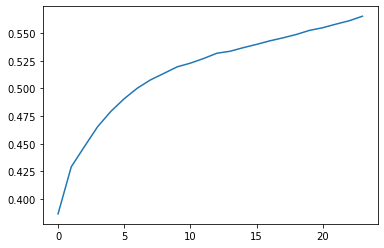

step: 1/2, D_loss: 0.1409948, G_loss_U: 2.9936209, G_loss_S: 0.024574818, E_loss_t0: 0.7003933


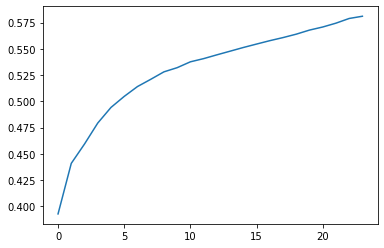

step: 1/2, D_loss: 0.14128077, G_loss_U: 2.9935462, G_loss_S: 0.02493692, E_loss_t0: 0.718963


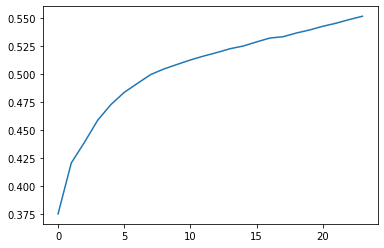

step: 1/2, D_loss: 0.1413553, G_loss_U: 2.9934614, G_loss_S: 0.024089666, E_loss_t0: 0.6748457


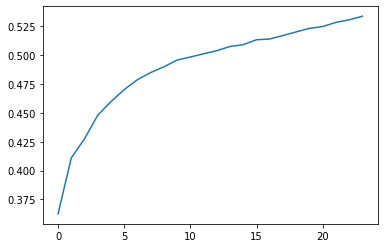

step: 1/2, D_loss: 0.14185673, G_loss_U: 2.9933681, G_loss_S: 0.023368115, E_loss_t0: 0.68405044


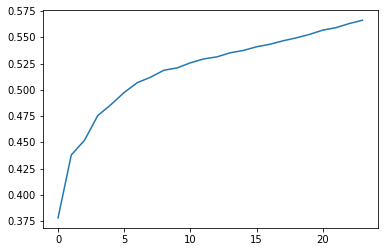

step: 1/2, D_loss: 0.14176121, G_loss_U: 2.9932778, G_loss_S: 0.023966057, E_loss_t0: 0.69137734


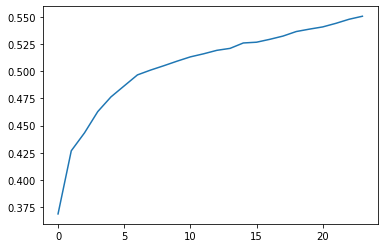

step: 1/2, D_loss: 0.14325762, G_loss_U: 2.993171, G_loss_S: 0.02507313, E_loss_t0: 0.71743995


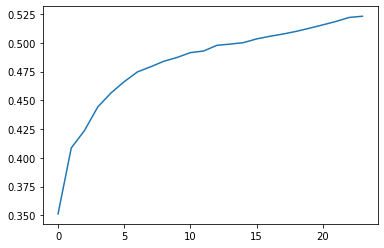

step: 1/2, D_loss: 0.14273968, G_loss_U: 2.9930499, G_loss_S: 0.023170736, E_loss_t0: 0.68292737


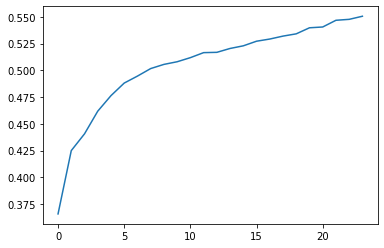

step: 1/2, D_loss: 0.1430493, G_loss_U: 2.9929173, G_loss_S: 0.023929952, E_loss_t0: 0.6679915


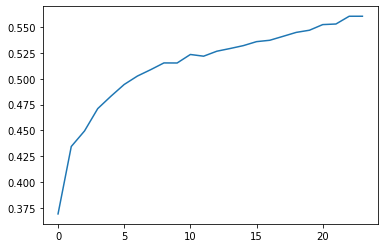

step: 1/2, D_loss: 0.14378259, G_loss_U: 2.99276, G_loss_S: 0.023172807, E_loss_t0: 0.65991414


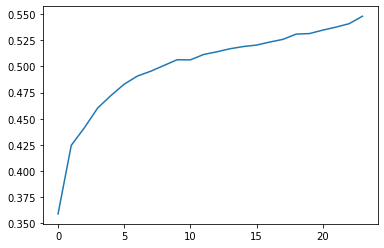

step: 1/2, D_loss: 0.14297436, G_loss_U: 2.9925716, G_loss_S: 0.022830363, E_loss_t0: 0.6242682


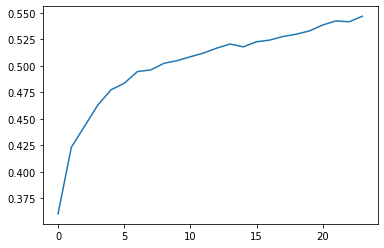

step: 1/2, D_loss: 0.14294143, G_loss_U: 2.9923391, G_loss_S: 0.022288281, E_loss_t0: 0.62560755


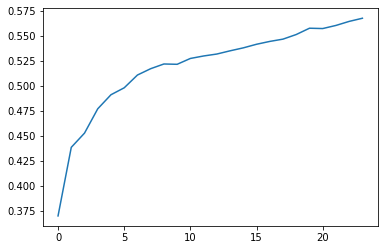

step: 1/2, D_loss: 0.14446469, G_loss_U: 2.992037, G_loss_S: 0.022374691, E_loss_t0: 0.6407413


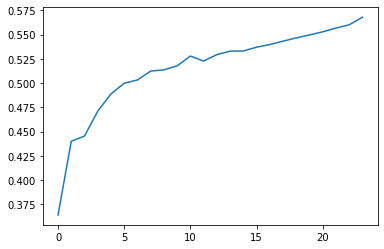

step: 1/2, D_loss: 0.14495598, G_loss_U: 2.9916432, G_loss_S: 0.021918261, E_loss_t0: 0.6354341


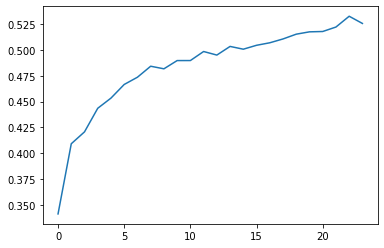

step: 1/2, D_loss: 0.14506122, G_loss_U: 2.9911273, G_loss_S: 0.022932325, E_loss_t0: 0.6638339


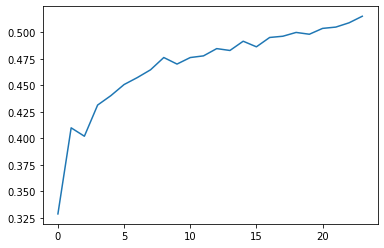

step: 1/2, D_loss: 0.14524567, G_loss_U: 2.9904652, G_loss_S: 0.021673162, E_loss_t0: 0.63149947


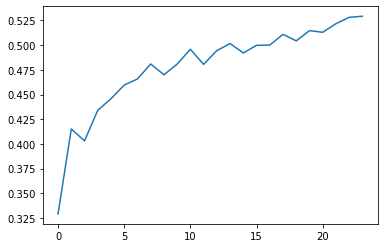

step: 1/2, D_loss: 0.14724839, G_loss_U: 2.9895935, G_loss_S: 0.022349395, E_loss_t0: 0.66300076


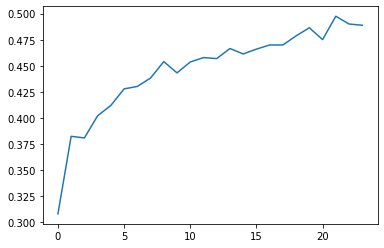

step: 1/2, D_loss: 0.14725411, G_loss_U: 2.9884722, G_loss_S: 0.021155028, E_loss_t0: 0.6102749


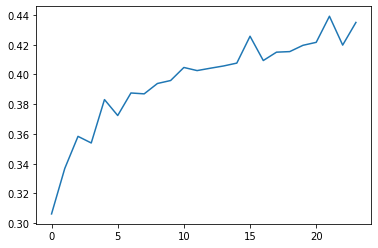

step: 1/2, D_loss: 0.14756805, G_loss_U: 2.9871292, G_loss_S: 0.021653846, E_loss_t0: 0.64761525


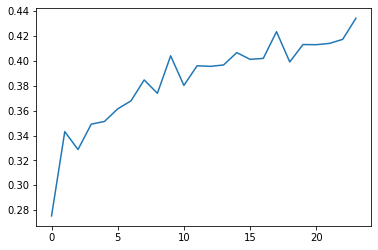

step: 1/2, D_loss: 0.14949653, G_loss_U: 2.9856606, G_loss_S: 0.021119881, E_loss_t0: 0.58824444


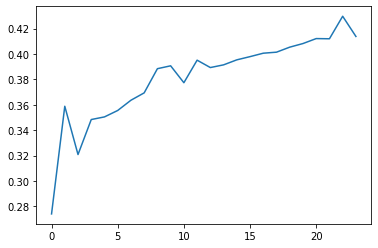

step: 1/2, D_loss: 0.15082304, G_loss_U: 3.1440086, G_loss_S: 0.021701744, E_loss_t0: 0.6570723


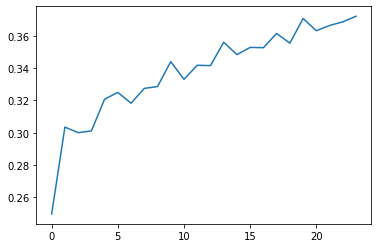

step: 1/2, D_loss: 0.14564829, G_loss_U: 3.1429768, G_loss_S: 0.020773984, E_loss_t0: 0.5658753


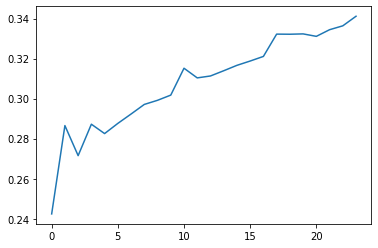

step: 1/2, D_loss: 0.14628555, G_loss_U: 3.142169, G_loss_S: 0.020168904, E_loss_t0: 0.60024613


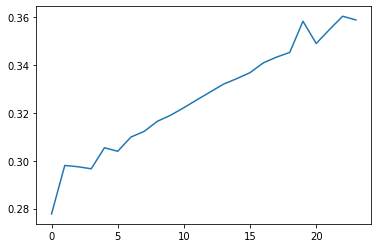

step: 1/2, D_loss: 0.14768183, G_loss_U: 3.1415927, G_loss_S: 0.020443564, E_loss_t0: 0.6055044


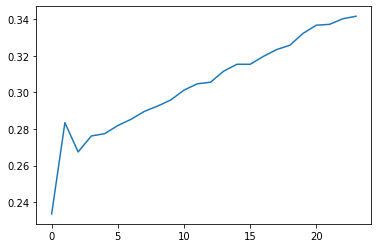

step: 1/2, D_loss: 0.15061046, G_loss_U: 3.2817554, G_loss_S: 0.021111567, E_loss_t0: 0.61627203


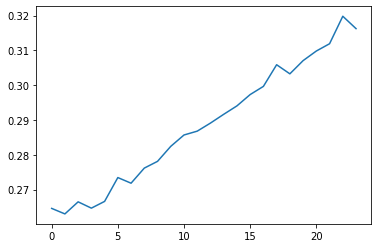

step: 1/2, D_loss: 0.24005203, G_loss_U: 3.389839, G_loss_S: 0.01949025, E_loss_t0: 0.6161907


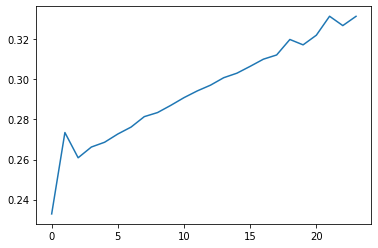

step: 1/2, D_loss: 0.25712147, G_loss_U: 3.4692488, G_loss_S: 0.020690424, E_loss_t0: 0.56167215


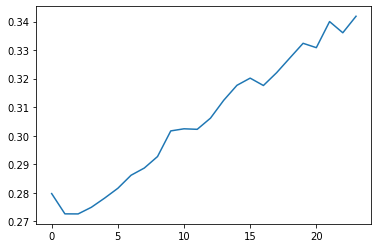

step: 1/2, D_loss: 0.3823041, G_loss_U: 3.4871209, G_loss_S: 0.021158364, E_loss_t0: 0.56954587


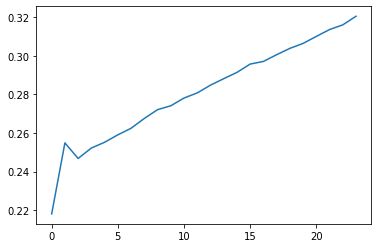

step: 1/2, D_loss: 0.14491577, G_loss_U: 3.4870358, G_loss_S: 0.020842416, E_loss_t0: 0.5633149


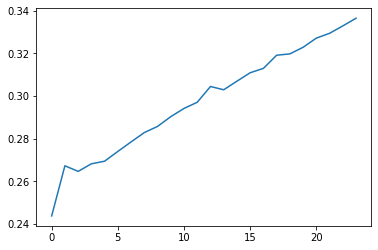

step: 1/2, D_loss: 0.12629989, G_loss_U: 3.4869633, G_loss_S: 0.021586139, E_loss_t0: 0.5625941


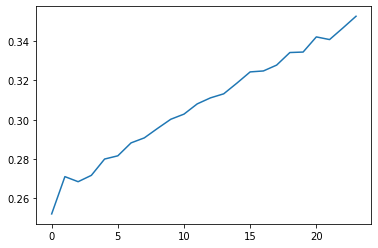

step: 1/2, D_loss: 0.124187335, G_loss_U: 3.4868891, G_loss_S: 0.021760574, E_loss_t0: 0.5770143


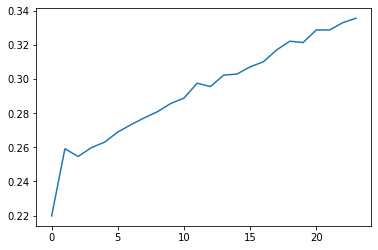

step: 1/2, D_loss: 0.12061037, G_loss_U: 3.4868147, G_loss_S: 0.022235684, E_loss_t0: 0.54487014


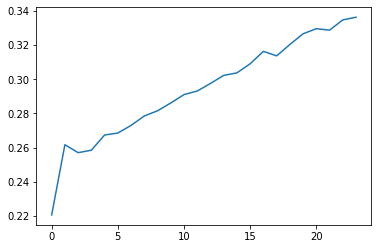

step: 1/2, D_loss: 0.12004793, G_loss_U: 3.4867353, G_loss_S: 0.022878096, E_loss_t0: 0.569192


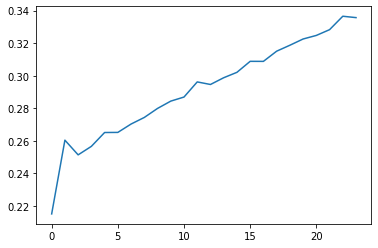

step: 1/2, D_loss: 0.11898236, G_loss_U: 3.486654, G_loss_S: 0.023645082, E_loss_t0: 0.57022417


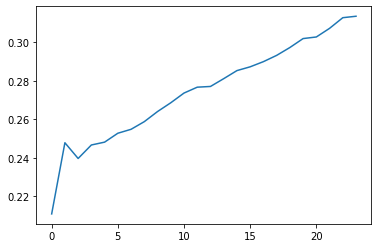

step: 1/2, D_loss: 0.11748148, G_loss_U: 3.4865477, G_loss_S: 0.023674354, E_loss_t0: 0.55464524


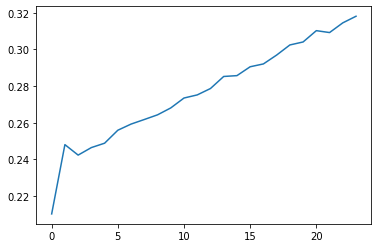

step: 1/2, D_loss: 0.11734109, G_loss_U: 3.4864419, G_loss_S: 0.023432272, E_loss_t0: 0.5578528


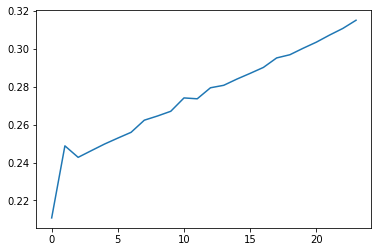

step: 1/2, D_loss: 0.11685373, G_loss_U: 3.486337, G_loss_S: 0.0248662, E_loss_t0: 0.57392424


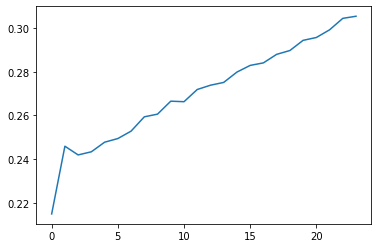

step: 1/2, D_loss: 0.11585785, G_loss_U: 3.486223, G_loss_S: 0.023575075, E_loss_t0: 0.5518754


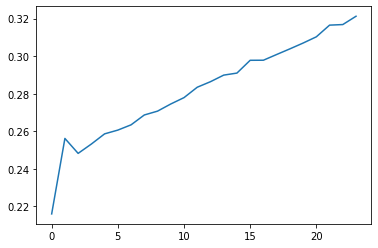

step: 1/2, D_loss: 0.11584612, G_loss_U: 3.486104, G_loss_S: 0.024132423, E_loss_t0: 0.5593398


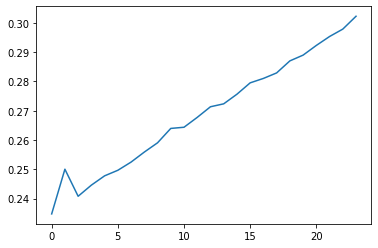

step: 1/2, D_loss: 0.11592713, G_loss_U: 3.485982, G_loss_S: 0.024484532, E_loss_t0: 0.5745798


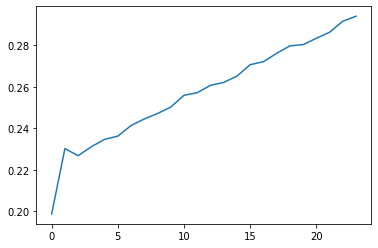

step: 1/2, D_loss: 0.115251884, G_loss_U: 3.4858592, G_loss_S: 0.023607992, E_loss_t0: 0.50788087


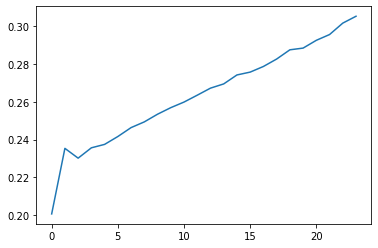

step: 1/2, D_loss: 0.115549825, G_loss_U: 3.4857357, G_loss_S: 0.024956487, E_loss_t0: 0.5677437


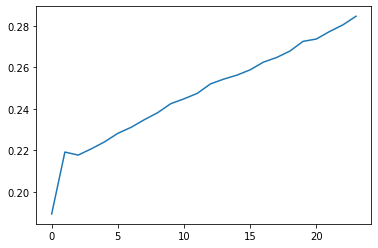

step: 1/2, D_loss: 0.11534868, G_loss_U: 3.4855976, G_loss_S: 0.02490861, E_loss_t0: 0.5576589


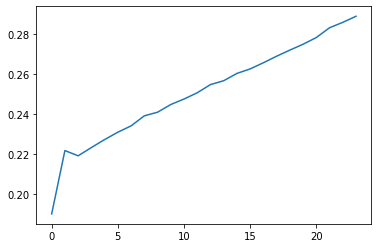

step: 1/2, D_loss: 0.11517546, G_loss_U: 3.4854443, G_loss_S: 0.024302557, E_loss_t0: 0.53309846


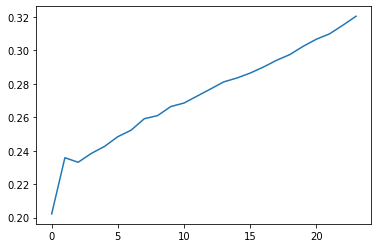

Finish Joint Training


In [4]:
Generator, Embedder, Supervisor, Recovery, Discriminator, checkpoints = TimeGAN(data, parameters)

A Data Set of the same size and dimensions of the original synthetic data Set is generated and visualized and both are compared

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...
[t-SNE] Computed neighbors for 2000 samples in 0.197s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.002519
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.840046
[t-SNE] KL divergence after 300 iterations: 0.924082


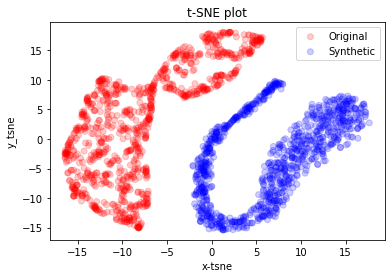

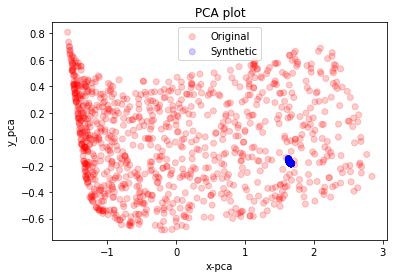

In [5]:
random_test = random_generator(no, dim, extract_time(data)[0], extract_time(data)[1])
test_sample = Generator(torch.tensor(random_generator(no, dim, extract_time(data)[0], extract_time(data)[1])).float())[0]
test_sample = torch.reshape(test_sample, (no, seq_len, parameters['hidden_dim']))
test_recovery = Recovery(test_sample)
test_recovery = torch.reshape(test_recovery[0], (no, seq_len, dim))
visualization(data, test_recovery.detach().numpy(), 'tsne')
visualization(data, test_recovery.detach().numpy(), 'pca')
  